In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
DF=pd.read_csv(r'C:\Users\gauta\Project\Mini Project\Diabetes Retinopathy Diagnosis\train.csv')

In [3]:
DF.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [4]:
DF['Binary_Type']=DF['diagnosis'].apply(lambda d:0 if d==0 else 1)

In [5]:
Stages={0:'No_DR',1:'Mild',2:'Moderate',3:'Severe',4:'Proliferate_DR'}
DF['Stage']=DF['diagnosis'].map(Stages.get)

In [6]:
DF.head()

,id_code,diagnosis,Binary_Type,Stage
0,000c1434d8d7,2,1,Moderate
1,001639a390f0,4,1,Proliferate_DR
2,0024cdab0c1e,1,1,Mild
3,002c21358ce6,0,0,No_DR
4,005b95c28852,0,0,No_DR


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_code      3662 non-null   object
 1   diagnosis    3662 non-null   int64 
 2   Binary_Type  3662 non-null   int64 
 3   Stage        3662 non-null   object
dtypes: int64(2), object(2)
memory usage: 114.6+ KB


In [7]:
import seaborn as sns

<Axes: xlabel='Binary_Type', ylabel='count'>

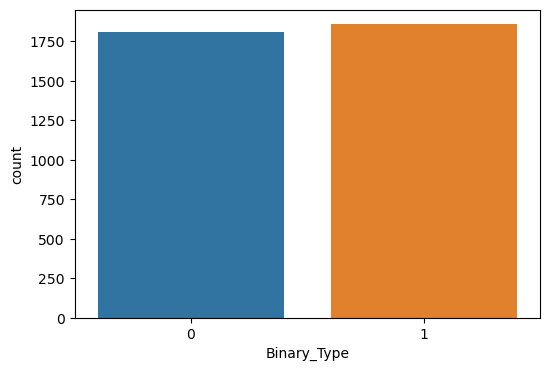

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x=DF['Binary_Type'],data=DF)

<Axes: xlabel='Stage', ylabel='count'>

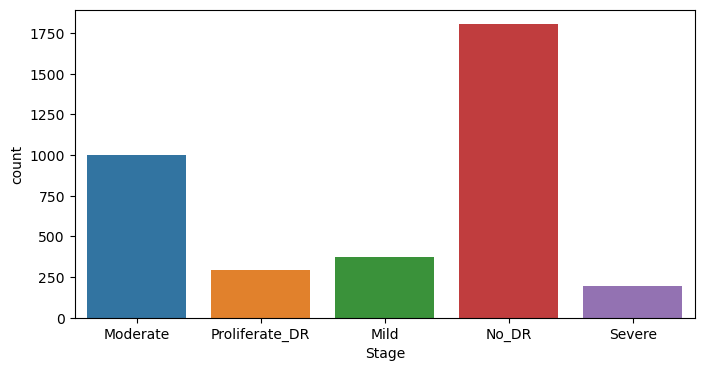

In [9]:
plt.figure(figsize=(8,4))
sns.countplot(x=DF['Stage'],data=DF)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_sub, val_data=train_test_split(DF, test_size=0.15, stratify=DF['Stage'])

train, test=train_test_split(train_sub, test_size= 0.15 / (1 - 0.15), stratify=train_sub['Stage'])

In [12]:
print('*Traing Data \n')
print(train['Stage'].value_counts(),'\n')
print('*Validation Data\n')
print(val_data['Stage'].value_counts(),'\n')
print('*Test Data\n')
print(test['Stage'].value_counts(),'\n')

*Traing Data 

Stage
No_DR             1263
Moderate           699
Mild               258
Proliferate_DR     207
Severe             135
Name: count, dtype: int64 

*Validation Data

Stage
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 

*Test Data

Stage
No_DR             271
Moderate          150
Mild               56
Proliferate_DR     44
Severe             29
Name: count, dtype: int64 



In [13]:
import shutil

In [14]:
base_dir=''
train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')
val_dir=os.path.join(base_dir,'validation')

if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
    
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)

if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

if os.path.exists(val_dir):
    shutil.rmtree(val_dir)
os.makedirs(val_dir)

In [15]:
img_src=r'C:\Users\gauta\Project\Mini Project\Diabetes Retinopathy Diagnosis\gaussian_filtered_images\gaussian_filtered_images'

for index, row in train.iterrows():
    diagnosis = row['Stage']
    binary_type = row['Binary_Type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(img_src, diagnosis, id_code)
    dstfile = os.path.join(train_dir, str(binary_type))
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in val_data.iterrows():
    diagnosis = row['Stage']
    binary_type = row['Binary_Type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(img_src, diagnosis, id_code)
    dstfile = os.path.join(val_dir, str(binary_type))
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

for index, row in test.iterrows():
    diagnosis = row['Stage']
    binary_type= row['Binary_Type']
    id_code = row['id_code'] + ".png"
    srcfile = os.path.join(img_src, diagnosis, id_code)
    dstfile = os.path.join(test_dir, str(binary_type))
    os.makedirs(dstfile, exist_ok = True)
    shutil.copy(srcfile, dstfile)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_batches=ImageDataGenerator(rescale=1./255).flow_from_directory('train',target_size=(224,224),shuffle=True)
test_batches=ImageDataGenerator(rescale=1./255).flow_from_directory('test',target_size=(224,224),shuffle=True)
validation_batches=ImageDataGenerator(rescale=1./255).flow_from_directory('validation',target_size=(224,224),shuffle=True)

Found 2562 images belonging to 2 classes.
Found 550 images belonging to 2 classes.
Found 550 images belonging to 2 classes.


In [21]:
model = tf.keras.Sequential()
model.add(Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(BatchNormalization()),

model.add(Conv2D(16, (3,3), padding="valid", activation = 'relu')),
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(BatchNormalization()),

model.add(Conv2D(32, (4,4), padding="valid", activation = 'relu')),
model.add(MaxPooling2D(pool_size=(2,2))),
model.add(BatchNormalization()),

model.add(Flatten()),
model.add(Dense(32, activation = 'relu')),
model.add(Dropout(0.15)),
model.add(Dense(2, activation = 'softmax'))

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 111, 111, 8)    │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 16)   │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 54, 54, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 51, 51, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │       640,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 649,938 (2.48 MB)

 Trainable params: 649,826 (2.48 MB)

 Non-trainable params: 112 (448.00 B)

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-5),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['acc'])

history = model.fit(train_batches,epochs=30,validation_data=validation_batches)

Epoch 1/30


C:\Users\gauta\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


81/81 ━━━━━━━━━━━━━━━━━━━━ 29s 262ms/step - acc: 0.7886 - loss: 0.5284 - val_acc: 0.5073 - val_loss: 0.6899
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 19s 223ms/step - acc: 0.8883 - loss: 0.2862 - val_acc: 0.5091 - val_loss: 0.6661
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - acc: 0.9194 - loss: 0.2357 - val_acc: 0.5691 - val_loss: 0.6137
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - acc: 0.9256 - loss: 0.2188 - val_acc: 0.6618 - val_loss: 0.5393
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - acc: 0.9264 - loss: 0.1976 - val_acc: 0.8036 - val_loss: 0.3983
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - acc: 0.9365 - loss: 0.1891 - val_acc: 0.9073 - val_loss: 0.2668
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - acc: 0.9412 - loss: 0.1887 - val_acc: 0.9273 - val_loss: 0.2220
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - acc: 0.9386 - loss: 0.1797 - val_acc: 0.9309 - val_loss: 0.2039
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 141ms/step - acc:

In [25]:
loss=pd.DataFrame(model.history.history)

In [26]:
loss

,acc,loss,val_acc,val_loss
0,0.845043,0.413384,0.507273,0.689881
1,0.896955,0.267527,0.509091,0.666107
2,0.917642,0.236369,0.569091,0.613665
3,0.923888,0.213933,0.661818,0.539328
4,0.929742,0.199346,0.803636,0.398296
5,0.937939,0.194326,0.907273,0.266804
6,0.943794,0.179562,0.927273,0.222042
7,0.943013,0.172646,0.930909,0.203922
8,0.947307,0.168061,0.927273,0.227336
9,0.950429,0.153484,0.932727,0.197461


<Axes: >

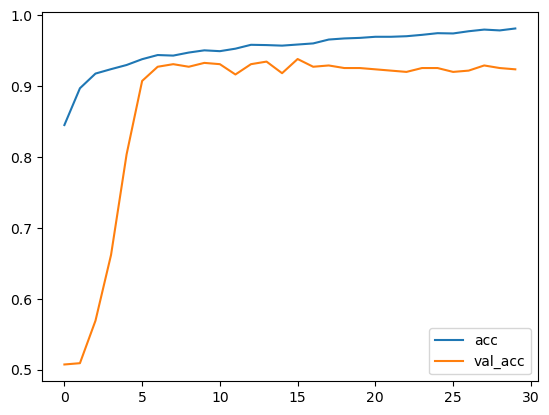

In [27]:
loss[['acc','val_acc']].plot()

<Axes: >

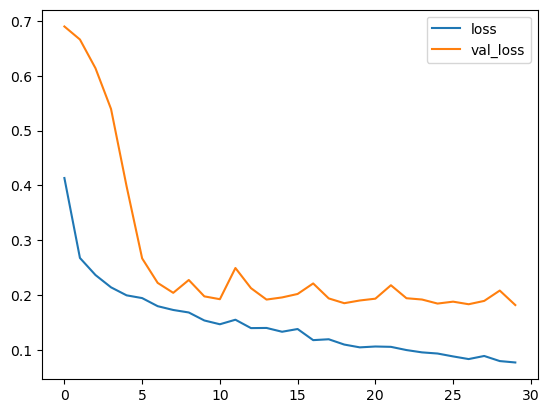

In [28]:
loss[['loss','val_loss']].plot()

In [30]:
loss, acc = model.evaluate(test_batches, verbose=1)
print("Loss: ", loss)
print("Accuracy: ", acc)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - acc: 0.9486 - loss: 0.1531
Loss:  0.16296014189720154
Accuracy:  0.9436363577842712


In [31]:
from tensorflow.keras.models import load_model

In [32]:
model.save('DR_CNN_Model.keras')

In [33]:
import cv2

In [49]:
def predict_class(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img= cv2.resize(img,(224,224))
    plt.imshow(img)
    
    image_arr = np.array(img) / 255.0
    DR_model = tf.keras.models.load_model("DR_CNN_Model.keras")
    prediction=DR_model.predict(np.array([image_arr]))
    perdicted=np.argmax(prediction,axis=1)
    if perdicted==1:
        return 'DR'
    else:
        return 'NO_DR'
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


'DR'

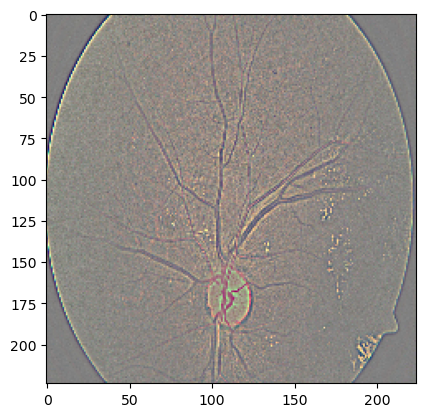

In [50]:
path=r'C:\Users\gauta\Mini Project\Diabetes Retinopathy\DB_DATA\gaussian_filtered_images\gaussian_filtered_images\mild\03e25101e8e8.png'
predict_class(path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 984ms/step


'NO_DR'

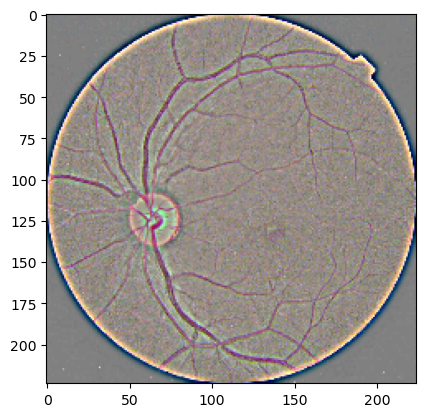

In [51]:
path1=r'C:\Users\gauta\Mini Project\Diabetes Retinopathy\DB_DATA\gaussian_filtered_images\gaussian_filtered_images\No_DR\002c21358ce6.png'
predict_class(path1)

In [46]:
test_batches.class_indices

{'0': 0, '1': 1}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


'DR'

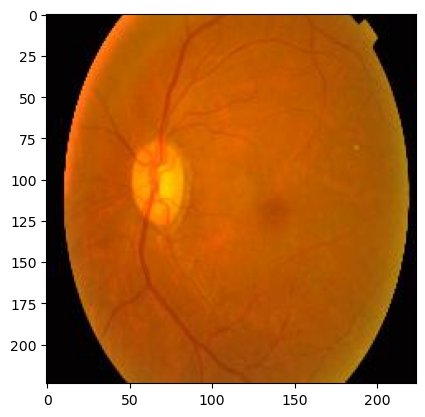

In [52]:
path2=r"C:\Users\gauta\Mini Project\DR1\Diabetes Retinopathy1\train\DR\0a61bddab956_png.rf.bf239142fcdfb66b1b8a02a9705cbe0b.jpg"
predict_class(path2)